# ObsID : 0945060134, SRCNUM : 1 and ObsID : 0945060133, SRCNUM : 5, Instru : Combined
The sources **34 1** and **33 5** are actually the same source. The observations of instruments of both are combined.

Not on Simbad.

## ESASky

In ESASky the pointer is on a green source, far from the nearest EPIC stack source. However, when looking at the image on XMM Archive, it would appear that it is indeed this green source (https://sky.esa.int/esasky/?target=53.59466666666666%20-28.902777777777782&hips=DSS2+color&fov=1&projection=SIN&cooframe=J2000&sci=true&lang=fr).

``2MASS``
- Name : 03342264-2854082
- RA : 03h 34m 22.642s
- DEC : -28° 54' 08.24"

``GAIA``
- Designation : DR3 5057101614813827200
- RA : 03h 34m 22.626s
- DEC : -28° 54' 08.62"
- Parallax : 2.941 mas
- G : 19.6951

In [1]:
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob
import numpy as np

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

plt.rcParams['figure.figsize'] = [12,7]

## Fit statistic

In [2]:
Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.
Parameter delta values for fits will now be 0.0001 * parValue


The expected reduce Chi-squared value of a perfect fit is **≈ 1** with: ``reduce Chi-squared = Chi-squared/(n_bins-n_parameters)``.

## Load files

In [3]:
AllData.clear()
spec = Spectrum(glob.glob('*spectrum_combined_grp_chi.fits')[0])


1 spectrum  in use
 
Spectral Data File: 34_1_33_5_source_spectrum_combined_grp_chi.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  2.265e-02 +/- 1.432e-03 (69.6 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-21
  Telescope: XMM Instrument: EPIC  Channel Type: PI
  Exposure Time: 1.669e+04 sec
 Using fit statistic: chi
 Using Background File                34_1_33_5_background_spectrum_combined.fits
  Background Exposure Time: 1.669e+04 sec
 Using Response (RMF) File            34_1_33_5_response_combined.rmf for Source 1



In [4]:
print(f"Number of counts = {2.265e-02*1.669e+04} cts")

Number of counts = 378.0285 cts


The number of counts is higher than 100 cts, indicating that the Chi-squared is a good fit statistic choice.

## Plot spectrum

In [5]:
Plot.xAxis="keV"
Plot.device = "/xs"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")
spec.ignore("**-0.2 12.0-**")

     2 channels (1-2) ignored in spectrum #     1
     1 channels (21) ignored in spectrum #     1



(-0.5, 855.5, 662.5, -0.5)

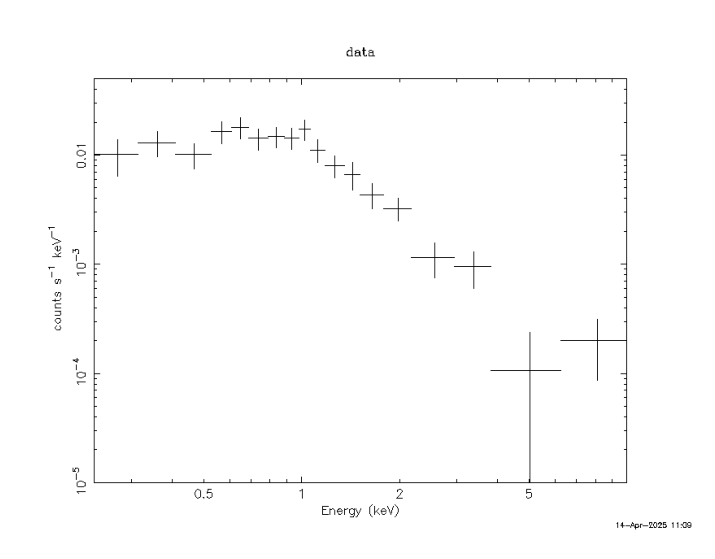

In [6]:
img = plt.imread(glob.glob('*Spectrum.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body model
There are 3 parameters in the ``tbabs*bbody`` model. Here, Chi-squared = 24.6907 using 18 bins, so the **reduce Chi-squared = 1.646**. The value is close to 1 meaning it is a good fit.

In [7]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbody = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared              1.372438e+13     using 18 bins.

Te

(-0.5, 854.5, 656.5, -0.5)

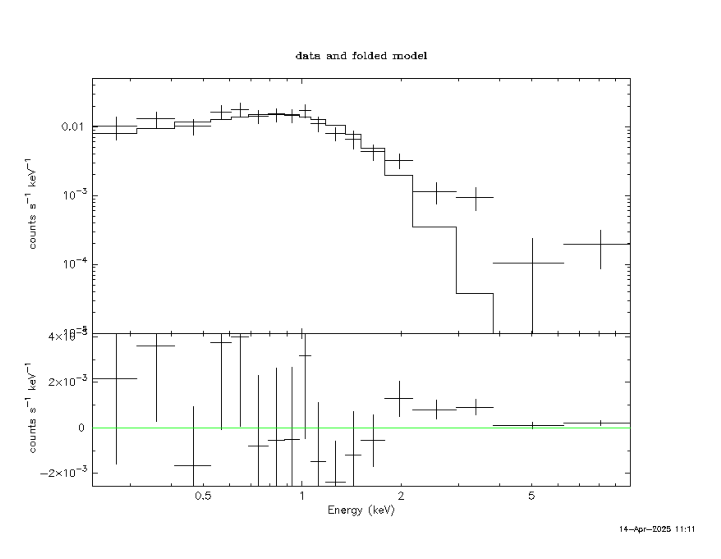

In [8]:
img = plt.imread(glob.glob('*Spectrum_bbody.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung model
There are 3 parameters in the ``tbabs*bremss`` model. Here, Chi-squared = 14.5160 using 18 bins, so the **reduce Chi-squared = 0.968**. The value is close to 1 meaning it is a good fit.

Second Chi-squared value closest to 1.

In [9]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.497131e+11     using 18 bins.

Test statistic : Chi-Squared              3.497131e+11     using 18 bins.
 Null hypothesis probability of 0.000000e+00 with 15 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
197.378      7.32637      -3      0.456005       26.1960   6.68531e-06
116.017      1.0786e+06    0     0.0541466       12.0124   6.69098e-06
59.3896      2.44343e+06   0     0.0191350       3.80121   8.58375e-06


(-0.5, 855.5, 659.5, -0.5)

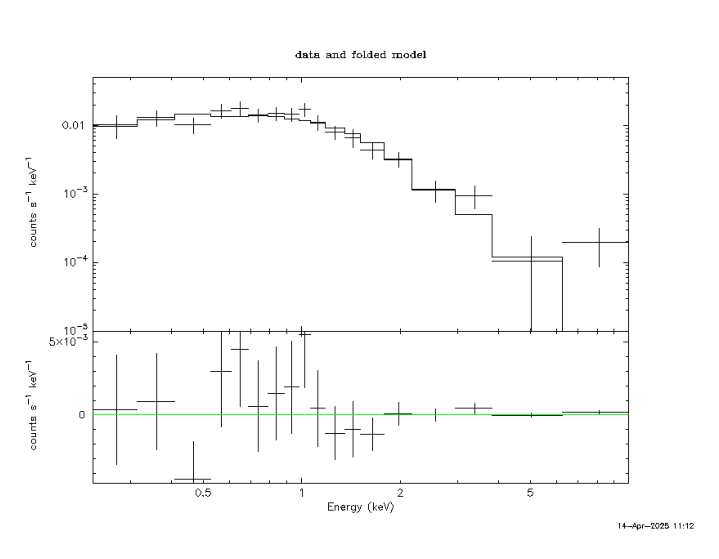

In [10]:
img = plt.imread(glob.glob('*Spectrum_bremss.png')[0])
plt.imshow(img)
plt.axis('off')

### Apec model
There are 4 parameters in the ``tbabs*apec`` model. Here, Chi-squared = 83.4018 using 18 bins, so the **reduce Chi-squared = 5.957**. The value is far to 1 meaning it is not a good fit.

In [11]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_apec = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              4.032205e+10     using 18 bins.

Test statistic : Chi-Squared              4.032205e+10     using 18 bins.
 Null hypothesis probability of 0.000000e+00 with 15 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
93.2211      14.9806      -3      0.863515      0.823053   

(-0.5, 852.5, 654.5, -0.5)

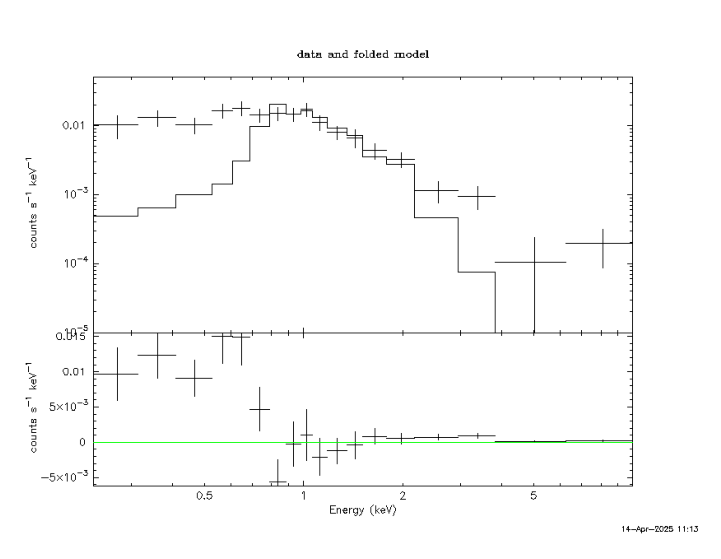

In [12]:
img = plt.imread(glob.glob('*Spectrum_apec.png')[0])
plt.imshow(img)
plt.axis('off')

### Powerlaw model
There are 3 parameters in the ``tbabs*powerlaw`` model. Here, Chi-squared = 15.0731 using 18 bins, so the **reduce Chi-squared = 1.005**. The value is close to 1 meaning it is a good fit.

Chi-squared value closest to 1.

In [13]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_powerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.581504e+12     using 18 bins.

Test statistic : Chi-Squared              2.581504e+12     using 18 bins.
 Null hypothesis probability of 0.000000e+00 with 15 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
220.538      7.0685       -1      0.362969       1.23286   1.87637e-06
211.023      3.23986e+06  -1      0.159786       1.30419   1.68971e-06
82.05        4.6181e+06   -2     0.0729197       2.79777   6.22344e-0

(-0.5, 857.5, 661.5, -0.5)

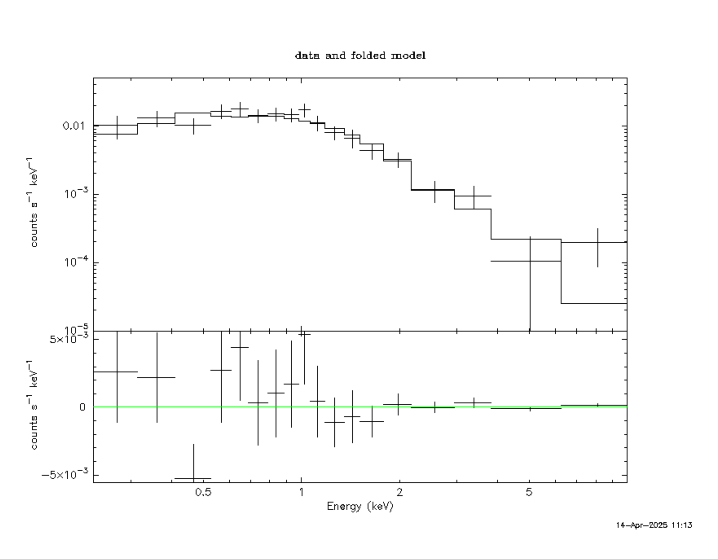

In [14]:
img = plt.imread(glob.glob('*Spectrum_powerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Black body + Powerlaw model
There are 5 parameters in the ``tbabs*(bbody+powerlaw)`` model. Here, Chi-squared = 14.9396 using 18 bins, so the **reduce Chi-squared = 1.149**. The value is close to 1 meaning it is a good fit.

In [15]:
AllModels.clear()
mo = Model("tbabs*(bbody+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bbodypowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(bbody<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.735649e+13     using 18 bins.

Test statistic : Chi-Squared              2.735649e+13     using 18 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
220.726      893232  

(-0.5, 856.5, 660.5, -0.5)

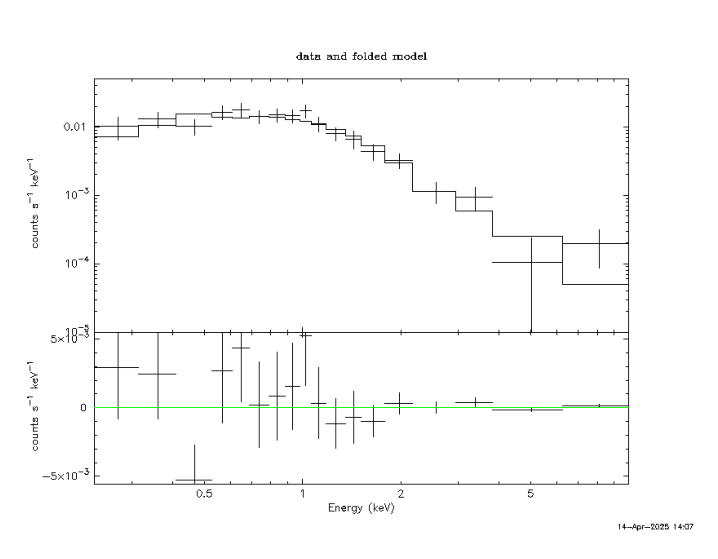

In [16]:
img = plt.imread(glob.glob('*Spectrum_bbodypowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Bremsstrahlung + Powerlaw model
There are 5 parameters in the ``tbabs*(bremss+powerlaw)`` model. Here, Chi-squared = 12.4011 using 18 bins, so the **reduce Chi-squared = 0.954**. The value is close to 1 meaning it is a good fit.

Third Chi-squared value closest to 1.

In [17]:
AllModels.clear()
mo = Model("tbabs*(bremss+powerlaw)")
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_bremsspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(bremss<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
   4    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   5    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.734088e+12     using 18 bins.

Test statistic : Chi-Squared              4.734088e+12     using 18 bins.
 Null hypothesis probability of 0.000000e+00 with 13 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm    4:PhoIndex        5:norm
211.84       241842 

(-0.5, 856.5, 656.5, -0.5)

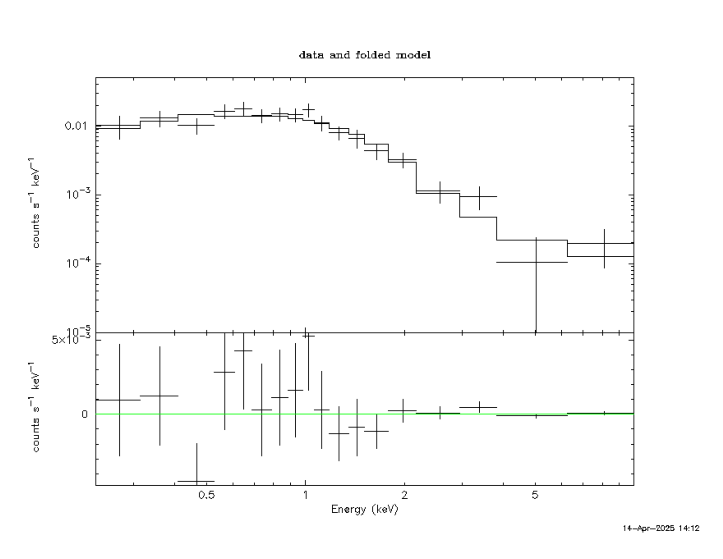

In [18]:
img = plt.imread(glob.glob('*Spectrum_bremsspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

### Gauss + Bremss model
**Energy: LineE = 6.4 to LineE = 6.7**

There are 6 parameters in the ``tbabs*gauss`` model. Here, Chi-squared = 11.5493 using 18 bins, so the **reduce Chi-squared = 0.9624**. The value is close to 1 meaning it is a good fit.

Fourth Chi-squared value closest to 1.

In [38]:
AllModels.clear()
mo = Model("tbabs*(gauss+bremss)")
mo.gaussian.LineE = 6.5
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_gaussbremss = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(gaussian<2> + bremss<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   gaussian   LineE      keV      6.50000      +/-  0.0          
   3    2   gaussian   Sigma      keV      0.100000     +/-  0.0          
   4    2   gaussian   norm                1.00000      +/-  0.0          
   5    3   bremss     kT         keV      7.00000      +/-  0.0          
   6    3   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.897420e+12     using 18 bins.

Test statistic : Chi-Squared              1.897420e+12     using 18 bins.
 Null hypothesis probability of 0.000000e+00 with 12 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.897420e+12     using 18 bins.

Test statistic

(-0.5, 856.5, 657.5, -0.5)

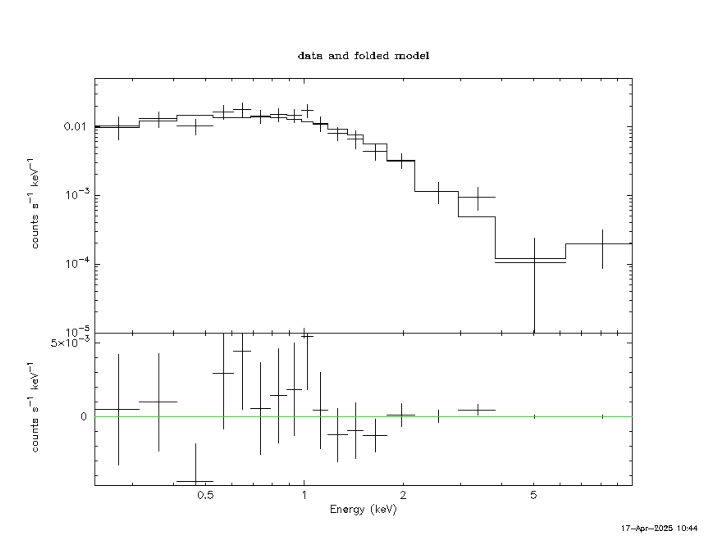

In [36]:
img = plt.imread(glob.glob('*Spectrum_bremssgauss.png')[0])
plt.imshow(img)
plt.axis('off')

### Gauss + Powerlaw model
**Energy: LineE = 6.4 to LineE = 6.7**

There are 6 parameters in the ``tbabs*(gauss+powerlaw)`` model. Here, Chi-squared = 12.6865 using 18 bins, so the **reduce Chi-squared = 1.057**. The value is close to 1 meaning it is a good fit.

In [21]:
AllModels.clear()
mo = Model("tbabs*(gauss+powerlaw)")
#mo.gaussian.LineE = 6.5 # Chi-squared = 12.7058
mo.gaussian.LineE = 6.7
mo.gaussian.LineE.frozen = True
Fit.perform()
Plot.device = "/xs"
Plot("data resid")
nH_gausspowerlaw = mo.TBabs.nH.values[0]
AllModels.calcFlux(".2 12.0")
AllModels.calcFlux(".3 3.5")


Model TBabs<1>(gaussian<2> + powerlaw<3>) Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   gaussian   LineE      keV      6.50000      +/-  0.0          
   3    2   gaussian   Sigma      keV      0.100000     +/-  0.0          
   4    2   gaussian   norm                1.00000      +/-  0.0          
   5    3   powerlaw   PhoIndex            1.00000      +/-  0.0          
   6    3   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              4.852538e+12     using 18 bins.

Test statistic : Chi-Squared              4.852538e+12     using 18 bins.
 Null hypothesis probability of 0.000000e+00 with 12 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              4.537878e+12     using 18 bins.

Test statist

(-0.5, 856.5, 659.5, -0.5)

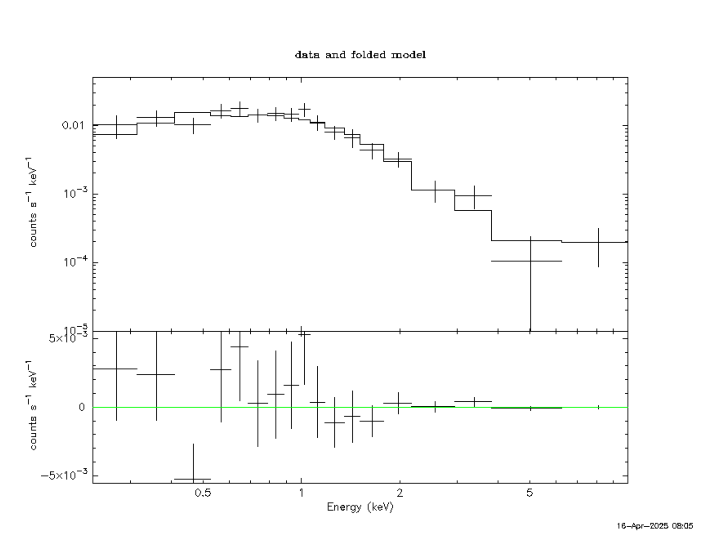

In [22]:
img = plt.imread(glob.glob('*Spectrum_gausspowerlaw.png')[0])
plt.imshow(img)
plt.axis('off')

## Column density nH
### 3DNH-tool
http://astro.uni-tuebingen.de/nh3d/nhtool

**Sky coordinates (°) :**

- RA = 53.5942754°
- Dec = -28.9023933°

53.59 -28.90

**Column density :** nH = 3e+20 cm^-2

In [39]:
print("The different models give a column density of :")
print()
print(color.BOLD+"bbody"+color.END)
print(f"nH = {nH_bbody*10**22} cm^-2")
print()
print(color.BOLD+"bremss (Second best fit)"+color.END)
print(f"nH = {nH_bremss*10**22} cm^-2")
print()
print(color.BOLD+"apec"+color.END)
print(f"nH = {nH_apec*10**22} cm^-2")
print()
print(color.BOLD+"powerlaw (Best fit)"+color.END)
print(f"nH = {nH_powerlaw*10**22} cm^-2")
print()
print(color.BOLD+"bbody+powerlaw"+color.END)
print(f"nH = {nH_bbodypowerlaw*10**22} cm^-2")
print()
print(color.BOLD+"bremss+powerlaw (Third best fit)"+color.END)
print(f"nH = {nH_bremsspowerlaw*10**22} cm^-2")
print()
print(color.BOLD+"gauss+bremss (Fourth best fit)"+color.END)
print(f"nH = {nH_gaussbremss*10**22} cm^-2")
print()
print(color.BOLD+"gauss+powerlaw"+color.END)
print(f"nH = {nH_gausspowerlaw*10**22} cm^-2")

The different models give a column density of :

bbody
nH = 273797.1089733657 cm^-2

bremss (Second best fit)
nH = 4.668832738362481e+20 cm^-2

apec
nH = 7.97088195405936e+21 cm^-2

powerlaw (Best fit)
nH = 1.418498203699363e+21 cm^-2

bbody+powerlaw
nH = 1.576365469454374e+21 cm^-2

bremss+powerlaw (Third best fit)
nH = 5.81326667399703e+20 cm^-2

gauss+bremss (Fourth best fit)
nH = 4.864487822689096e+20 cm^-2

gauss+powerlaw
nH = 1.5044502665148328e+21 cm^-2


## Flux
### X-ray flux
- X-ray flux of the best-fitting model ``Powerlaw`` with Chi-squared = 1.005 using 18 bins: **4.6587e-14 ergs/cm^2/s**.
- X-ray flux of the second best-fitting model ``Bremss`` with Chi-squared = 0.968 using 18 bins: **4.0638e-14 ergs/cm^2/s**.
- X-ray flux of the third best-fitting model ``Bremss + Powerlaw`` with Chi-squared = 0.954 using 18 bins: **1.138e-13 ergs/cm^2/s**.

In [24]:
Flux_pow = 4.6587e-14 # ergs/cm^2/s
Flux_bremss = 4.0638e-14 # ergs/cm^2/s
Flux_bp = 1.138e-13 # ergs/cm^2/s
print(color.BOLD+"X-ray flux [0.2-12.0] keV : "+color.END)
print(f"Powerlaw : F_x-ray = {Flux_pow} ergs/cm^2/s")
print(f"Bremsstrahlung : F_x-ray = {Flux_bremss} ergs/cm^2/s")
print(f"Bremsstrahlung + Powerlaw : F_x-ray = {Flux_bp} ergs/cm^2/s")

X-ray flux [0.2-12.0] keV : 
Powerlaw : F_x-ray = 4.6587e-14 ergs/cm^2/s
Bremsstrahlung : F_x-ray = 4.0638e-14 ergs/cm^2/s
Bremsstrahlung + Powerlaw : F_x-ray = 1.138e-13 ergs/cm^2/s


In [25]:
def F_optical(mag):
    F0 = 1.05*10**(-5) # GAIA zero point magnitude
    return F0*10**(-0.4*mag)

G = 19.6951

F = F_optical(G)

print(color.BOLD+"Optical flux : "+color.END+f"F_optical = {F} ergs/cm^2/s")

Optical flux : F_optical = 1.390430542671063e-13 ergs/cm^2/s


### X-ray flux / Optical flux ratio

In [26]:
print(color.BOLD+"X-ray flux / Optical flux ratio : "+color.END)
print(f"Powerlaw : F_x-ray = {Flux_pow/F} ergs/cm^2/s")
print(f"Bremss : F_x-ray = {Flux_bremss/F} ergs/cm^2/s")
print(f"Bremss + Powerlaw : F_x-ray = {Flux_bp/F} ergs/cm^2/s")

X-ray flux / Optical flux ratio : 
Powerlaw : F_x-ray = 0.3350544926214353 ergs/cm^2/s
Bremss : F_x-ray = 0.29226918391718476 ergs/cm^2/s
Bremss + Powerlaw : F_x-ray = 0.8184515263983373 ergs/cm^2/s


### Maccacaro et al. paper: log(fx/fv)
https://articles.adsabs.harvard.edu/pdf/1988ApJ...326..680M
- fx : X-ray flux in the 0.3-3.5 keV band in ergs/cm^2/s.
- mv : Visual magnitude.

In [27]:
def logfxfv(fx,mv):
    return np.log10(fx)+(mv/2.5)+5.37

fx_pow = 3.5438e-14 # ergs/cm^2/s
fx_bremss = 3.5892e-14 # ergs/cm^2/s
fx_bp = 3.5148e-14 # ergs/cm^2/s

logfxfv_pow = logfxfv(fx_pow,G)
logfxfv_bremss = logfxfv(fx_bremss,G)
logfxfv_bp = logfxfv(fx_bp,G)

print(color.BOLD+"X-ray flux [0.3-3.5] keV : "+color.END)
print(f"Powerlaw : fx = {fx_pow} ergs/cm^2/s")
print(f"Bremsstrahlung : fx = {fx_bremss} ergs/cm^2/s")
print(f"Bremsstrahlung + Powerlaw : fx = {fx_bp} ergs/cm^2/s")
print()
print(color.BOLD+"log(fx/fv) : "+color.END)
print(f"Powerlaw : log(fx/fv) = {logfxfv_pow}")
print(f"Bremsstrahlung : log(fx/fv) = {logfxfv_bremss}")
print(f"Bremsstrahlung + Powerlaw : log(fx/fv) = {logfxfv_bp}")

X-ray flux [0.3-3.5] keV : 
Powerlaw : fx = 3.5438e-14 ergs/cm^2/s
Bremsstrahlung : fx = 3.5892e-14 ergs/cm^2/s
Bremsstrahlung + Powerlaw : fx = 3.5148e-14 ergs/cm^2/s

log(fx/fv) : 
Powerlaw : log(fx/fv) = -0.20249079619450772
Bremsstrahlung : log(fx/fv) = -0.1969623409210568
Bremsstrahlung + Powerlaw : log(fx/fv) = -0.2060593822707757


## Luminosity

In [28]:
"""GAIA"""

P_mas = 2.941 # Parallaxe en mas
d_kpc = 1/P_mas # Distance en kpc
d_cm = d_kpc*3.0857*10**21 # Distance en cm, avec 1 pc = 3.0857*10^18 cm

# La source est supposée sphérique pour le calcul de la luminosité : L = 4*pi*F*D^2
Luminosity_pow = 4*np.pi*Flux_pow*(d_cm)**2 # erg/s
Luminosity_bremss = 4*np.pi*Flux_bremss*(d_cm)**2 # erg/s
Luminosity_bp = 4*np.pi*Flux_bp*(d_cm)**2 # erg/s

print(color.BOLD+"(GAIA)"+color.END)
print(f"Distance : d = {d_cm} cm")
print(color.BOLD+"Luminosity : "+color.END)
print(f"Powerlaw: L_x-ray = {Luminosity_pow} ergs/cm^2/s")
print(f"Bremss: L_x-ray = {Luminosity_bremss} ergs/cm^2/s")
print(f"Bremss + Powerlaw : L_x-ray = {Luminosity_bp} ergs/cm^2/s")

(GAIA)
Distance : d = 1.0492009520571234e+21 cm
Luminosity : 
Powerlaw: L_x-ray = 6.444540550332065e+29 ergs/cm^2/s
Bremss: L_x-ray = 5.621594841573711e+29 ergs/cm^2/s
Bremss + Powerlaw : L_x-ray = 1.5742346891360015e+30 ergs/cm^2/s
